In [2]:
#Imorting data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv"
df = pd.read_csv(data_path)

# Preview the data
df.head()



,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


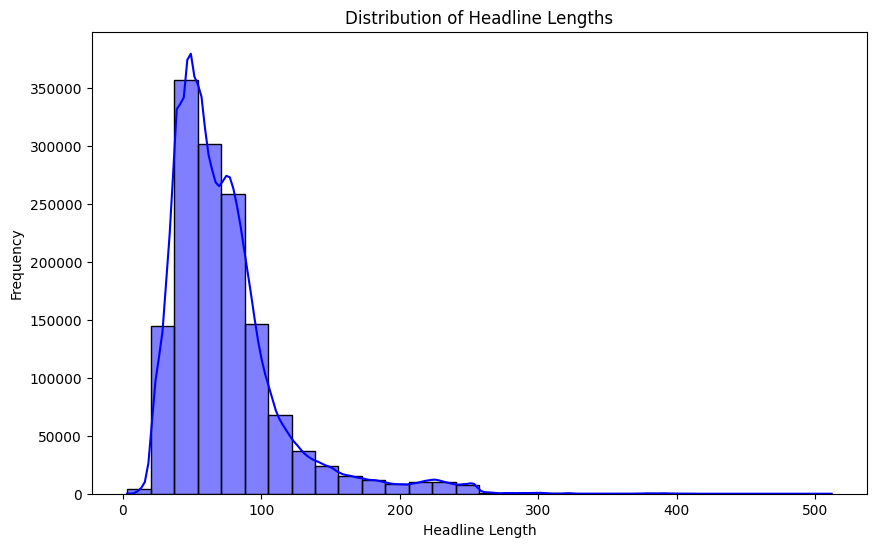

In [3]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

# Plot the distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], kde=True, bins=30, color='blue')
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()


Articles Per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


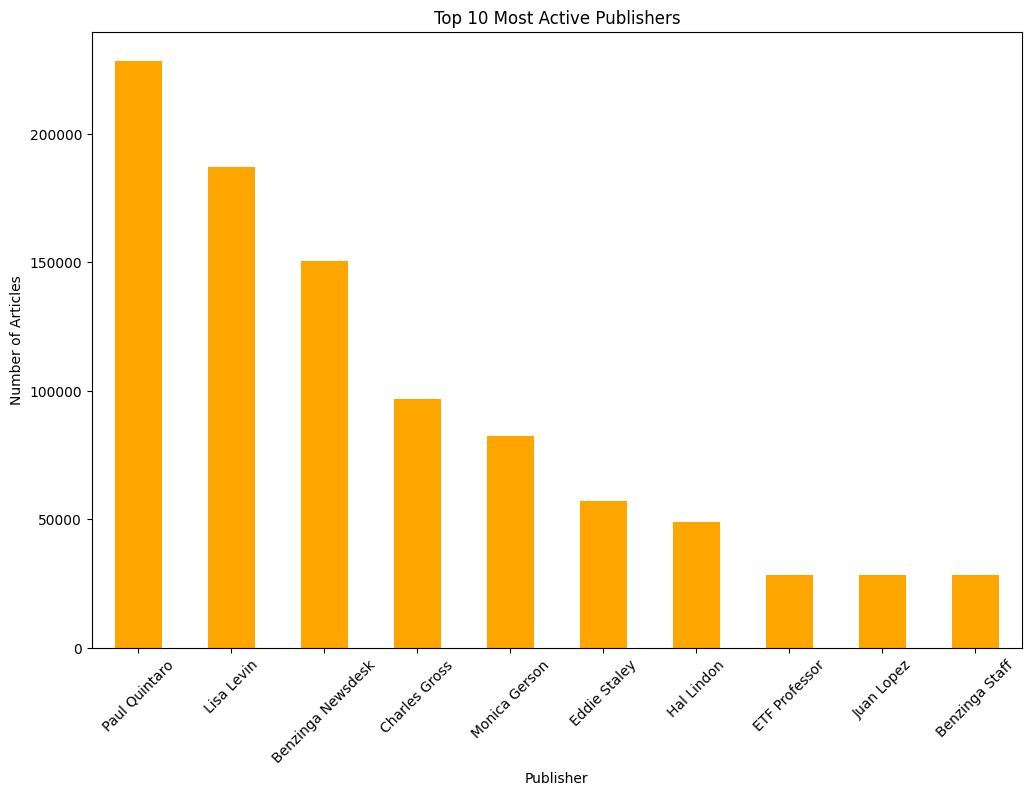

In [4]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Articles Per Publisher:")
print(publisher_counts)

# Visualize the most active publishers
plt.figure(figsize=(12, 8))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


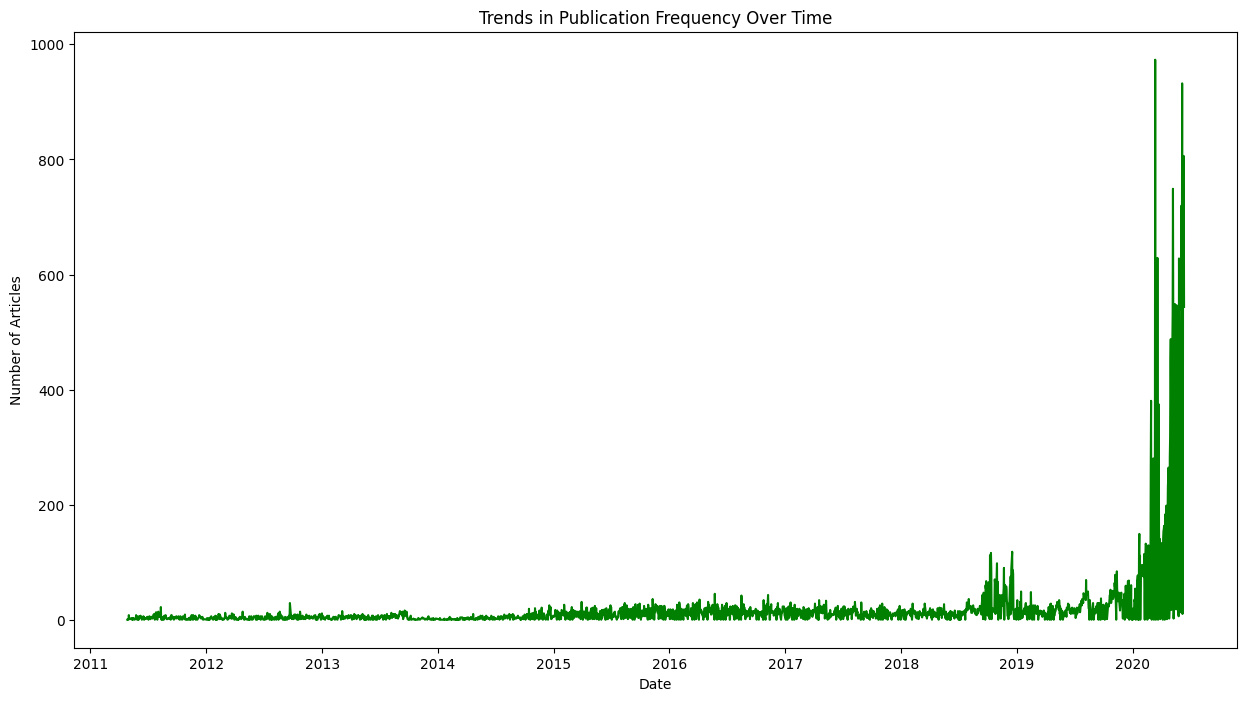

Publication Spikes:
date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64


In [5]:
# Convert publication date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Count articles by date
daily_counts = df.groupby(df['date'].dt.date).size()

# Plot trends over time
plt.figure(figsize=(15, 8))
daily_counts.plot(color='green')
plt.title("Trends in Publication Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

# Identify specific events with spikes in publication frequency
spikes = daily_counts[daily_counts > daily_counts.mean() + 2 * daily_counts.std()]
print("Publication Spikes:")
print(spikes)
